In [17]:
COVID_dir = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling' # set this to your directory 
import numpy as np
import sys
import os
sys.path.insert(1, COVID_dir)
from test import test_random_M, get_accuracy
from optimal_sizes import optimal_pool_size, minT, entropy
import json
from membership_matrix import generate_const_row_weight, generate_doubly_regular
import matplotlib.pyplot as plt

In [10]:
dr_num_random_matrices = 50
crw_num_random_matrices = 100
n = 384
T = 48
num_trials = 100

fpr, fnr = 0, 0

In [13]:
dr_row_weights = [i for i in range(8, 61, 2)]
crw_row_weights = [i for i in range(1, 61, 2)]
ks = [i for i in range(1, 10)]

In [ ]:
for m in [54, 56, 58, 60]: 
    test_random_M(m, 6, n, T, num_random_matrices, COVID_dir, generate_matrix=generate_doubly_regular, print_every=10)

Starting matrix 0


In [36]:
def plot_accuracy(k, row_weights, error_type):
    doubly_regular_dir = COVID_dir + '/tests/results/doubly-regular/'
    const_row_weight_dir = COVID_dir + '/tests/results/const-row-weight/'
    
    dr_x, dr_y, dr_average_acc = get_accuracy(COVID_dir, doubly_regular_dir, n, k, T, num_trials, dr_num_random_matrices, dr_row_weights, error_type)
    crw_x, crw_y, crw_average_acc = get_accuracy(COVID_dir, const_row_weight_dir, n, k, T, num_trials, crw_num_random_matrices, crw_row_weights, error_type)

    plt.scatter(dr_x, dr_y)
    plt.xlabel('row weights')
    plt.ylabel('accuracy')
    title = 'Scatter plot for doubly-regular accuracy (f = %s/384) based on % s' % (k, error_type)
    plt.title(title)
    plt.show() 
    
    plt.scatter(crw_x, crw_y, color='orange')
    plt.xlabel('row weights')
    plt.ylabel('accuracy')
    title = 'Scatter plot for constant-row-weight accuracy (f = %s/384) based on % s' % (k, error_type)
    plt.title(title)
    plt.show() 

    plt.scatter(dr_row_weights, dr_average_acc)
    plt.scatter(crw_row_weights, crw_average_acc)
    title = 'Scatter plot for average accuracy (f = %s/384) based on %s' % (k, error_type)
    plt.title(title)
    plt.show()

    if error_type == 'num_errors':
        print("theoretical optimal pool size: %.3f" % optimal_pool_size(k / n, 0, 0))
        optimal_size = row_weights[dr_average_acc.index(np.max(dr_average_acc))]
        print("emperical optimal pool size for doubly regular: %s" % optimal_size)
        print("entropy for the emperical optimal pool size: %.3f" % entropy(optimal_size, k / n))

# Results for doubly regular based on 50 membership matrices

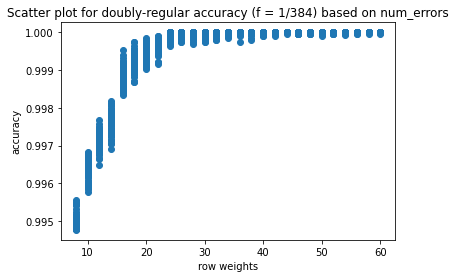

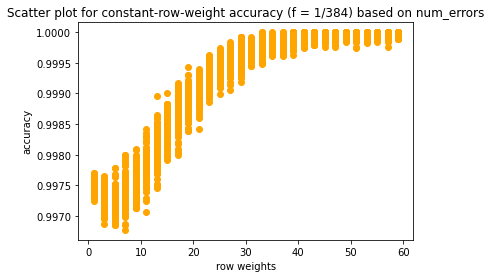

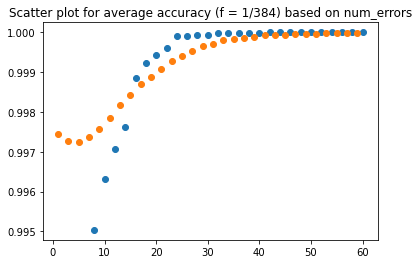

theoretical optimal pool size: 265.822
emperical optimal pool size for doubly regular: 44
entropy for the emperical optimal pool size: 0.495


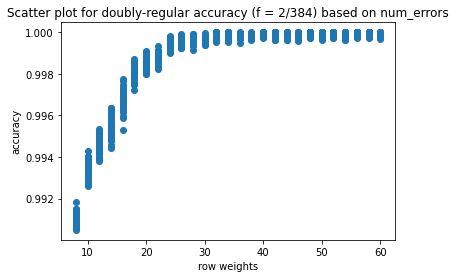

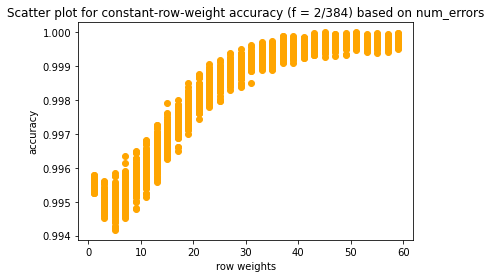

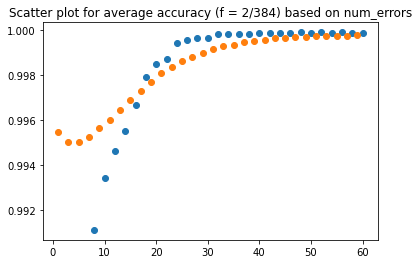

theoretical optimal pool size: 132.737
emperical optimal pool size for doubly regular: 56
entropy for the emperical optimal pool size: 0.817


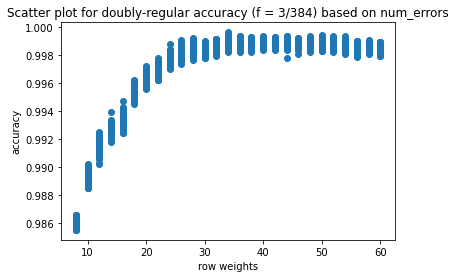

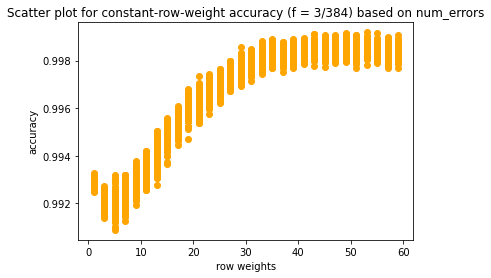

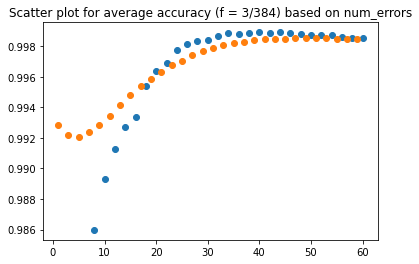

theoretical optimal pool size: 88.376
emperical optimal pool size for doubly regular: 40
entropy for the emperical optimal pool size: 0.840


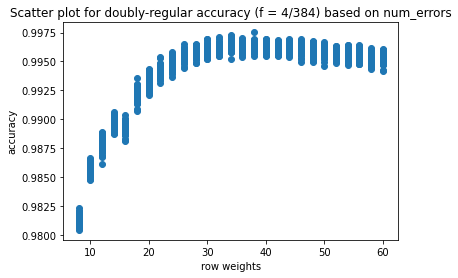

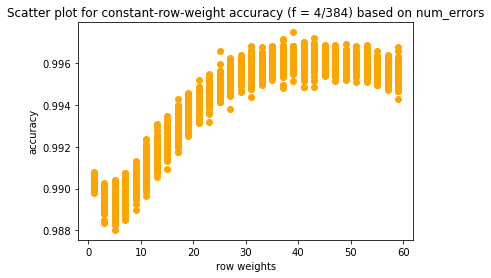

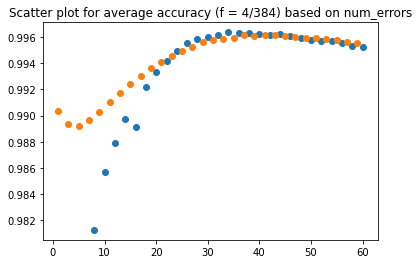

theoretical optimal pool size: 66.195
emperical optimal pool size for doubly regular: 34
entropy for the emperical optimal pool size: 0.881


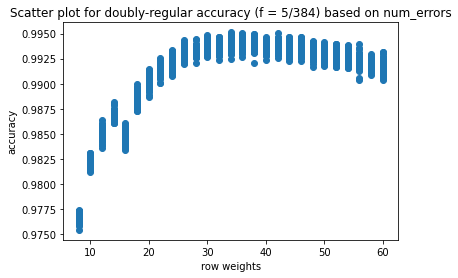

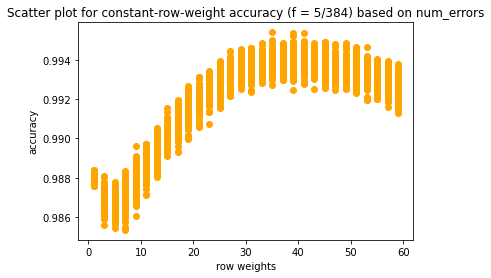

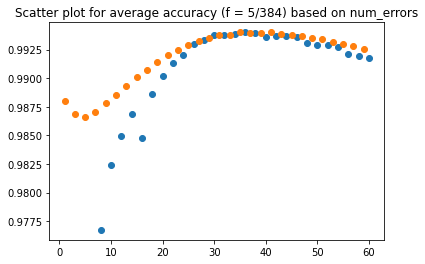

theoretical optimal pool size: 52.886
emperical optimal pool size for doubly regular: 36
entropy for the emperical optimal pool size: 0.955


In [37]:
for k in range(1, 6): 
    plot_accuracy(k, row_weights, 'num_errors')

In [29]:
row_weights[4]

16

In [22]:
M = generate_doubly_regular((T, n), 17)

In [23]:
M.sum(0)

array([2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2., 2., 3., 2., 2., 3., 2.,
       2., 2., 3., 2., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 3., 2., 2., 2., 2., 3.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       2., 2., 3., 3., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 3., 3.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [4]:
test_random_M(16, 6, n, T, fpr, fnr, num_random_matrices, COVID_dir, generate_matrix=generate_doubly_regular, print_every=10)

Starting matrix 0
Starting matrix 10
Starting matrix 20
Starting matrix 30
Starting matrix 40
Test result for constant row weight = 16, infection rate 6/384:
(based on 50 membership matrices)
Average Accuracy: 0.98 
